In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation



In [30]:
DATASET = "blobs_dataset.csv"
K_CLUSTERS = 3

df = pd.read_csv(DATASET)
df.head()

,feature_1,feature_2,label
0,-8.028029,-9.004721,2
1,-9.030661,-7.841498,2
2,-0.452835,5.962177,0
3,4.095676,4.720112,1
4,-11.974939,-9.400325,2


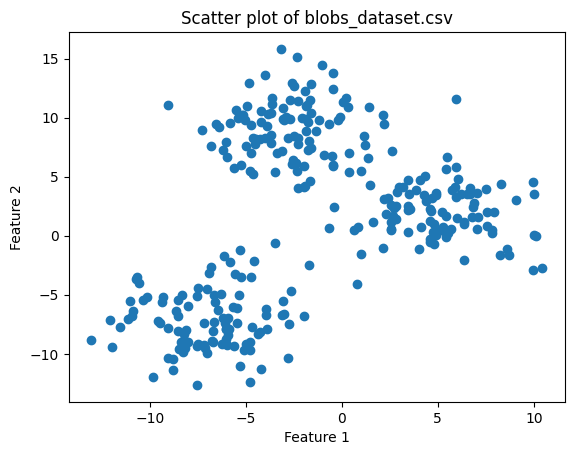

In [31]:


plt.scatter(df.iloc[:, 0], df.iloc[:, 1])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter plot of blobs_dataset.csv')
plt.show()

In [32]:
df['classification'] = -1

In [33]:
df.head()

,feature_1,feature_2,label,classification
0,-8.028029,-9.004721,2,-1
1,-9.030661,-7.841498,2,-1
2,-0.452835,5.962177,0,-1
3,4.095676,4.720112,1,-1
4,-11.974939,-9.400325,2,-1


In [34]:
# Colores para clústeres
cluster_colors = ['red', 'green', 'blue']
light_colors = ['lightcoral', 'lightgreen', 'lightblue']


frames = []  # Aquí guardamos un frame por cada instancia evaluada

In [35]:
# Parámetros
max_iter = 100
min_changes = int(0.1 * len(df))

np.random.seed(42)
initial_indices = np.random.choice(df.index, K_CLUSTERS, replace=False)
centroids = df.loc[initial_indices, ['feature_1', 'feature_2']].reset_index(drop=True)

for iteration in range(max_iter):
    cambios = 0
    for idx in df.index:
        row = df.loc[idx]
        point = row[['feature_1', 'feature_2']].to_numpy(dtype=float)
        distances = np.linalg.norm(centroids.values - point, axis=1)
        closest_centroid = np.argmin(distances)

        if df.at[idx, 'classification'] != closest_centroid:
            cambios += 1
        df.at[idx, 'classification'] = closest_centroid

        # Guardar frame después de clasificar este punto
        frames.append((df[['feature_1', 'feature_2', 'classification']].copy(), centroids.copy(), idx))

    # Actualizar centroides después de revisar todos los puntos
    for k in range(K_CLUSTERS):
        cluster_points = df[df['classification'] == k][['feature_1', 'feature_2']]
        if not cluster_points.empty:
            centroids.loc[k] = cluster_points.mean().values

    if cambios < min_changes:
        break


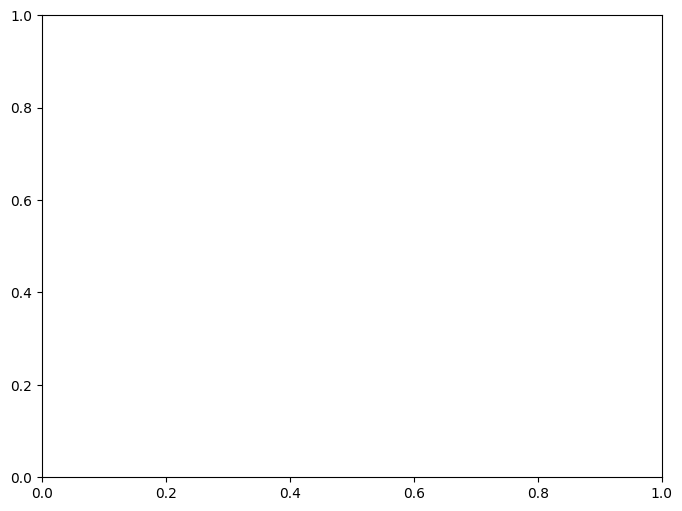

In [36]:
fig, ax = plt.subplots(figsize=(8, 6))

def update(frame):
    data, centroids, current_idx = frame
    ax.clear()

    # Dibujar todos los puntos ya clasificados
    for k in range(K_CLUSTERS):
        points = data[(data['classification'] == k) & (data.index <= current_idx)]
        ax.scatter(points['feature_1'], points['feature_2'], 
                   c=cluster_colors[k], alpha=0.5, label=f'Cluster {k}')

    # Dibujar puntos aún sin clasificar (index > actual)
    unclassified = data[(data['classification'] == -1) | (data.index > current_idx)]
    if not unclassified.empty:
        ax.scatter(unclassified['feature_1'], unclassified['feature_2'], 
                   c='gray', alpha=0.3, label='Sin clasificar')

    # Dibujar centroides
    for k in range(K_CLUSTERS):
        c = centroids.loc[k]
        ax.scatter(c.iloc[0], c.iloc[1], c=cluster_colors[k], marker='*', s=250, edgecolor='black')


    ax.set_title(f"K-Means - Evaluando instancia {current_idx}")
    ax.legend(loc='upper right')


In [37]:
ani = FuncAnimation(fig, update, frames=frames, interval=50, repeat=False)
plt.show()


In [38]:

ani.save("kmeans_step_by_step.gif", writer="pillow")


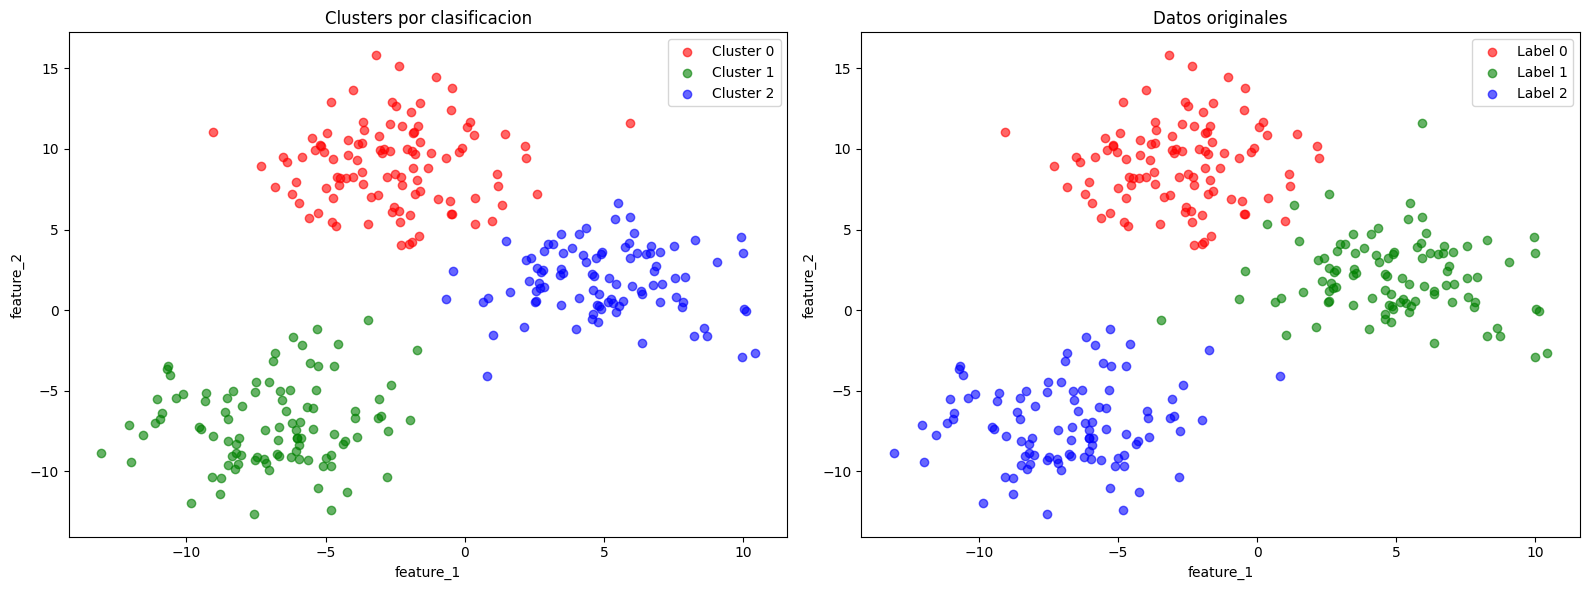

In [39]:
colors = {0: 'red', 1: 'green', 2: 'blue'}
plt.figure(figsize=(16, 6))

# Clusters por clasificación
plt.subplot(1, 2, 1)
for c in range(K_CLUSTERS):
    cluster = df[df['classification'] == c]
    plt.scatter(cluster['feature_1'], cluster['feature_2'],
                color=colors[c], label=f'Cluster {c}', alpha=0.6)
plt.xlabel('feature_1')
plt.ylabel('feature_2')
plt.title('Clusters por clasificacion')
plt.legend()

# Datos originales por label
plt.subplot(1, 2, 2)
for c in range(K_CLUSTERS):
    cluster = df[df['label'] == c]
    plt.scatter(cluster['feature_1'], cluster['feature_2'],
                color=colors[c], label=f'Label {c}', alpha=0.6)
plt.xlabel('feature_1')
plt.ylabel('feature_2')
plt.title('Datos originales')
plt.legend()

plt.tight_layout()
plt.show()

In [40]:
# esta metrica esta mal por que los clusteres no necesariamente corresponden a las etiquetas
accuracy = (df['label'] == df['classification']).sum() / len(df)
print(f"Porcentaje de aciertos: {accuracy * 100:.2f}%")


# Para evaluar la calidad del clustering podemos usar ARI (Adjusted Rand Index)
from sklearn.metrics import adjusted_rand_score
ari = adjusted_rand_score(df['label'], df['classification'])    
print(f"ARI: {ari * 100:.2f}%")

Porcentaje de aciertos: 34.00%
ARI: 94.10%
